In [1]:
!pip install Prophet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
from google.colab import files
uploaded = files.upload()

ubisoft_df  = pd.read_csv(
    "ubisoft_Stock.csv")

display(ubisoft_df.head())
display(ubisoft_df.tail())

Saving ubisoft_Stock.csv to ubisoft_Stock.csv


,Date,TICKER,Open,High,Low,Close,Volume,Currency
0,2010-01-05,UBSFY,2.97,2.97,2.97,2.97,500,USD
1,2010-01-11,UBSFY,3.14,3.19,3.10,3.10,1815,USD
2,2010-01-12,UBSFY,3.00,3.00,3.00,3.00,500,USD
3,2010-01-13,UBSFY,2.90,2.90,2.83,2.83,13500,USD
4,2010-01-14,UBSFY,2.78,2.78,2.75,2.75,3285,USD


,Date,TICKER,Open,High,Low,Close,Volume,Currency
2595,2022-08-29,UBSFY,8.93,8.95,8.81,8.82,53368,USD
2596,2022-08-30,UBSFY,9.08,9.09,9.03,9.05,131248,USD
2597,2022-08-31,UBSFY,9.22,9.25,9.18,9.19,54148,USD
2598,2022-09-01,UBSFY,8.77,8.79,8.66,8.77,115518,USD
2599,2022-09-02,UBSFY,8.78,8.97,8.68,8.68,100673,USD


In [4]:
prophet_df = ubisoft_df[['Date', 'Close']]
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54mzk6dw/ntuz6abw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp54mzk6dw/yjd679_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8505', 'data', 'file=/tmp/tmp54mzk6dw/ntuz6abw.json', 'init=/tmp/tmp54mzk6dw/yjd679_3.json', 'output', 'file=/tmp/tmp54mzk6dw/prophet_modelil7b9t3r/prophet_model-20230721024405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:44:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:44:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future_dates = model.make_future_dataframe(periods= 2000, freq='D')

In [6]:
forecast = model.predict(future_dates)

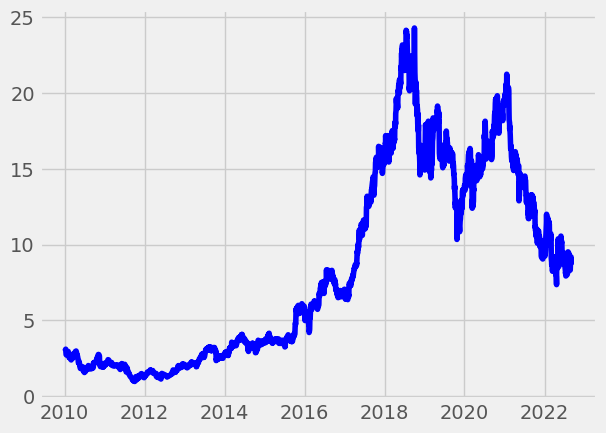

In [7]:
plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


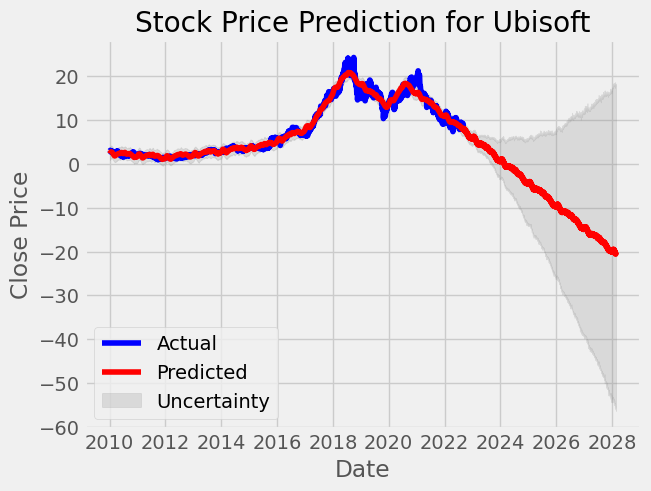

In [8]:

plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Predicted')


plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction for Ubisoft')
plt.legend()
plt.show()